In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
%matplotlib inline

In [2]:
obesity = pd.read_csv(os.path.join("..","Data","Clean","US_Adults_Percent_Overweight_by_State_Year_Clean.csv"))
liver = pd.read_csv(os.path.join("..","Data","Clean","Liver_Disease_Cirrhosis_Mortality_Clean.csv"))
alc_use = pd.read_csv(os.path.join("..","Data","Clean","Alcohol_Use_Geo_Data_Clean.csv"))

In [3]:
obesity_df = pd.DataFrame(obesity)
liver_df = pd.DataFrame(liver)
alc_use_df = pd.DataFrame(alc_use)

In [4]:
obesity_df.head()

,Location,2013,2014,2015,2016,2017
0,United States,0.638,0.641,0.645,0.648,0.654
1,Alabama,0.682,0.670,0.687,0.695,0.702
2,Alaska,0.661,0.648,0.672,0.667,0.667
3,Arizona,0.618,0.640,0.653,0.632,0.648
4,Arkansas,0.699,0.706,0.695,0.682,0.705


In [5]:
liver_df.head()

,STATE,AVERAGE DEATH RATE,TOTAL DEATHS,2005 DEATH RATE,2005 DEATH COUNT,2014 DEATH RATE,2014 DEATH COUNT,2015 DEATH RATE,2015 DEATH COUNT,2016 DEATH RATE,2016 DEATH COUNT,2017 DEATH RATE,2017 DEATH COUNT,14 - 17 DEATH RATE CHANGE,14 - 17 DEATH RATE % CHANGE,14 - 17 DEATHS % CHANGE
0,AK,13.30,495,9.0,52,10.7,84,15.4,114,16.3,124,15.1,121,4.4,0.411215,0.440476
1,AL,11.98,3414,9.7,478,11.8,683,12.5,716,13.2,781,12.7,756,0.9,0.076271,0.106881
2,AR,10.62,1833,7.5,228,10.4,369,12.1,421,11.8,416,11.3,399,0.9,0.086538,0.081301
3,AZ,14.24,5305,12.7,757,14.3,1084,15.0,1149,14.9,1178,14.3,1137,0.0,0.000000,0.048893
4,CA,12.02,24872,11.1,3822,12.0,5013,12.7,5425,12.2,5287,12.1,5325,0.1,0.008333,0.062238


In [6]:
alc_use_df.head()

,Geographic/Socioeconomic Type,Geographic/Socioeconomic Characteristic,Lifetime Alcohol Use 2017 (K),Lifetime Alcohol Use 2018 (K),Past Year Alcohol Use 2017 (K),Past Year Alcohol Use 2018 (K),Past Month Alcohol Use 2017 (K),Past Month Alcohol Use 2018 (K),Past Month Binge Alcohol Use 2017 (K),Past Month Binge Alcohol Use 2018 (K),Past Month Heavy Alcohol Use 2017 (K),Past Month Heavy Alcohol Use 2018 (K),YOY % Change Heavy Use,YOY % Change Binge Use
0,Overall,TOTAL,204536,206099,165552,166459,133148,132688,62122,62737,15785,15708,-0.004878,0.009900
1,GEOGRAPHIC REGION,Northeast,37109,36594,31502,30672,25778,24862,11820,11491,2918,2883,-0.011995,-0.027834
2,GEOGRAPHIC REGION,Midwest,44429,44548,36183,36532,29227,29577,13938,14425,3724,3638,-0.023093,0.034940
3,GEOGRAPHIC REGION,South,74907,76328,58610,59621,46082,46308,21881,22354,5674,5430,-0.043003,0.021617
4,GEOGRAPHIC REGION,West,48091,48630,39257,39634,32061,31940,14484,14467,3468,3757,0.083333,-0.001174


In [7]:
obs_states_df = obesity_df.loc[obesity_df['Location'].isin(["California", "Colorado", "Oregon","Texas","Washington"])]
obs_states_df.head()
                                        

,Location,2013,2014,2015,2016,2017
5,California,0.601,0.597,0.604,0.610,0.609
6,Colorado,0.564,0.574,0.566,0.581,0.587
38,Oregon,0.599,0.617,0.645,0.626,0.645
44,Texas,0.661,0.678,0.687,0.684,0.694
48,Washington,0.614,0.634,0.625,0.635,0.622


In [8]:
# x_axis = list(obs_states_df.columns.values)
# x_axis

In [71]:
obs_st_df=obs_states_df.set_index('Location')
obs_st_df=obs_st_df.transpose()
obs_st_df = obs_st_df[['Texas','Oregon','Washington','California','Colorado']]
obs_st_df

Location,Texas,Oregon,Washington,California,Colorado
2013,0.661,0.599,0.614,0.601,0.564
2014,0.678,0.617,0.634,0.597,0.574
2015,0.687,0.645,0.625,0.604,0.566
2016,0.684,0.626,0.635,0.610,0.581
2017,0.694,0.645,0.622,0.609,0.587


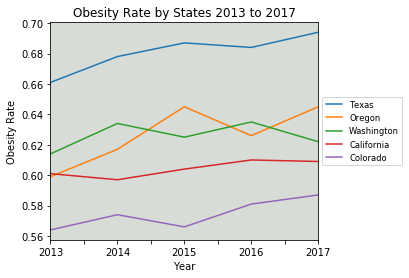

In [221]:
# ax = plt.axes()
# ax.set_facecolor("xkcd:light grey")
ax = obs_st_df.plot.line(title="Obesity Rate by States 2013 to 2017")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Obesity Rate")
ax.set_xlabel("Year")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Obesity_Rates.png"),bbox_inches="tight")
plt.show()

In [222]:
liver_yearrate_df = liver_df.drop(['AVERAGE DEATH RATE',
'TOTAL DEATHS',
'2005 DEATH COUNT',
'2005 DEATH RATE',
'2014 DEATH COUNT',
'2015 DEATH COUNT',
'2016 DEATH COUNT',
'2017 DEATH COUNT',
'14 - 17 DEATH RATE CHANGE',
'14 - 17 DEATH RATE % CHANGE',
'14 - 17 DEATHS % CHANGE'], axis=1)
liver_yearrate_df = liver_yearrate_df.loc[liver_yearrate_df['STATE'].isin(["CA", "CO","OR","TX","WA"])]
liver_yearrate_df.rename(columns={'2014 DEATH RATE':'2014','2015 DEATH RATE':'2015','2016 DEATH RATE':'2016','2017 DEATH RATE':'2017'},inplace=True)
liver_yearrate_df.head()

,STATE,2014,2015,2016,2017
4,CA,12.0,12.7,12.2,12.1
5,CO,12.7,12.2,12.4,14.0
36,OR,12.8,13.7,12.2,12.6
42,TX,13.5,13.8,13.5,13.9
46,WA,11.1,12.4,11.1,11.4


In [223]:
liver_rate = liver_yearrate_df.set_index("STATE")
liver_rate = liver_rate.transpose()
liver_rate = liver_rate[['CO','TX','OR','CA','WA']]
liver_rate = liver_rate.transpose()
liver_rate

,2014,2015,2016,2017
STATE,,,,
CO,12.7,12.2,12.4,14.0
TX,13.5,13.8,13.5,13.9
OR,12.8,13.7,12.2,12.6
CA,12.0,12.7,12.2,12.1
WA,11.1,12.4,11.1,11.4


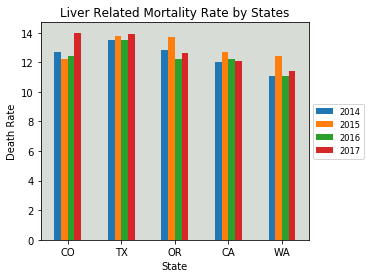

In [290]:
ax = liver_rate.plot.bar(title="Liver Related Mortality Rate by States")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation='0', horizontalalignment='center')
ax.set_xlabel("State")
ax.set_ylabel("Death Rate")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Liver_Mortality_Rates.png"),bbox_inches="tight")
plt.show()

In [225]:
liver_yearcount_df = liver_df.drop(['AVERAGE DEATH RATE',
'TOTAL DEATHS',
'2005 DEATH COUNT',
'2005 DEATH RATE',
'2014 DEATH RATE',
'2015 DEATH RATE',
'2016 DEATH RATE',
'2017 DEATH RATE',
'14 - 17 DEATH RATE CHANGE',
'14 - 17 DEATH RATE % CHANGE',
'14 - 17 DEATHS % CHANGE'], axis=1)
liver_yearcount_df = liver_yearcount_df.loc[liver_yearcount_df['STATE'].isin(["CA", "CO","OR","TX","WA"])]
liver_yearcount_df.rename(columns={'2014 DEATH COUNT':'2014','2015 DEATH COUNT':'2015','2016 DEATH COUNT':'2016','2017 DEATH COUNT':'2017'},inplace=True)
liver_yearcount_df.head()

,STATE,2014,2015,2016,2017
4,CA,5013,5425,5287,5325
5,CO,743,735,751,865
36,OR,599,667,606,642
42,TX,3680,3844,3880,4107
46,WA,901,1024,926,982


In [226]:
liver_count = liver_yearcount_df.set_index("STATE")
liver_count = liver_count.transpose()
liver_count = liver_count[['CA','TX','WA','CO','OR']]
liver_count = liver_count.transpose()
liver_count

,2014,2015,2016,2017
STATE,,,,
CA,5013,5425,5287,5325
TX,3680,3844,3880,4107
WA,901,1024,926,982
CO,743,735,751,865
OR,599,667,606,642


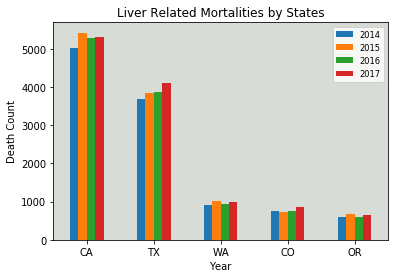

In [227]:
ax = liver_count.plot.bar(title="Liver Related Mortalities by States")
ax.legend(fontsize='small', loc='best')
ax.set_xticklabels(ax.get_xticklabels(), rotation='0', horizontalalignment='center')
ax.set_xlabel("Year")
ax.set_ylabel("Death Count")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Liver_Mortality_Counts.png"),bbox_inches="tight")
plt.show()

In [271]:
us_wine = pd.read_csv(os.path.join("..","Data","Clean","us_wineries_2009_2019_clean.csv"))
us_wine_df = pd.DataFrame(us_wine)
us_wine_df

,year,number of wineries in US
0,2009,6357
1,2010,6941
2,2011,7306
3,2012,7396
4,2013,7498
5,2014,7762
6,2015,8287
7,2016,8702
8,2017,9091
9,2018,9654


In [229]:
us_wine_df['number of wineries in US'] = us_wine_df['number of wineries in US'].map('{:,}'.format)
us_wine_df['wineries'] = us_wine_df['number of wineries in US'].astype(str) + ' wineries'
us_wine_df

,year,number of wineries in US,wineries
0,2009,"6,357","6,357 wineries"
1,2010,"6,941","6,941 wineries"
2,2011,"7,306","7,306 wineries"
3,2012,"7,396","7,396 wineries"
4,2013,"7,498","7,498 wineries"
5,2014,"7,762","7,762 wineries"
6,2015,"8,287","8,287 wineries"
7,2016,"8,702","8,702 wineries"
8,2017,"9,091","9,091 wineries"
9,2018,"9,654","9,654 wineries"


In [230]:
year= []
winery_count= []

year = us_wine_df['year'].values
winery_count = us_wine_df['wineries'].values

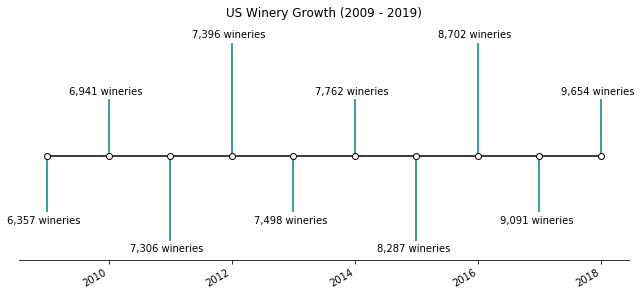

In [231]:
# Choose some nice levels
levels = np.tile([-1, 1, -1.5, 2, -1, 1,-1.5, 2, -1, 1],
                 len(year))[:len(year)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="US Winery Growth (2009 - 2019)")

markerline, stemline, baseline = ax.stem(year, levels,
                                         linefmt="teal", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(year)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(year, levels, winery_count, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")

# format xaxis
# plt.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)
plt.savefig(os.path.join("..","Images","US_Wineries_10yrs.png"),bbox_inches="tight")
plt.show()

In [232]:
rec_GDP = pd.read_csv(os.path.join("..","Data","Clean","GDP_recreational_data_Clean.csv"))
rec_GDP_df = pd.DataFrame(rec_GDP)
rec_GDP_df

,GeoFips,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,% Change 2009 to 2018,% Change 2008 to 2017,% Change 1998 to 2017
0,0,United States*,0.10,0.20,0.22,-0.13,0.10,0.10,0.17,0.01,...,0.09,0.08,0.14,0.10,0.05,0.09,0.11,-1.500000,-2.125000,-0.100000
1,1000,Alabama,0.12,0.13,0.05,-0.02,0.03,0.06,0.05,0.13,...,0.10,0.03,0.09,0.05,0.01,0.03,0.12,-2.090909,-1.300000,-0.750000
2,2000,Alaska,0.05,0.19,0.21,-0.02,0.25,0.10,0.05,-0.04,...,0.06,0.06,0.06,0.06,-0.10,-0.17,0.04,-1.153846,-2.062500,-4.400000
3,4000,Arizona,0.22,0.18,0.35,-0.20,0.13,0.22,0.38,0.40,...,0.22,0.13,-0.14,0.12,0.06,0.27,0.17,-1.500000,-1.642857,0.227273
4,5000,Arkansas,0.11,0.14,0.08,-0.08,0.07,0.08,0.17,0.06,...,0.02,-0.02,0.08,0.07,0.04,0.06,0.02,-1.250000,-1.750000,-0.454545
5,6000,California,0.20,0.19,0.28,-0.05,0.19,0.25,0.20,-0.10,...,0.09,0.08,0.31,0.15,0.13,0.09,0.18,-1.600000,-2.285714,-0.550000
6,8000,Colorado,0.14,0.28,0.31,-0.08,0.09,-0.08,0.09,0.25,...,0.06,0.42,0.20,0.32,0.07,0.16,0.20,-1.666667,-17.000000,0.142857
7,9000,Connecticut,-0.07,0.16,0.21,-0.09,0.09,0.06,0.05,-0.03,...,0.15,-0.10,-0.16,0.07,0.07,0.04,0.07,6.000000,3.000000,-1.571429
8,10000,Delaware,0.27,0.13,0.24,-0.14,0.11,0.11,0.08,-0.21,...,-0.10,-0.09,0.04,0.02,0.01,0.01,0.08,-1.363636,-1.250000,-0.962963
9,11000,District of Columbia,0.07,0.27,0.38,-0.01,0.07,0.10,0.27,0.10,...,0.25,0.09,0.09,0.15,-0.09,0.19,0.13,-2.083333,-4.800000,1.714286


In [233]:
rec_GDP_df = rec_GDP_df.loc[rec_GDP_df['GeoName'].isin(["California", "Colorado", "Oregon","Texas","Washington"])]
rec_GDP_df.head()

,GeoFips,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,% Change 2009 to 2018,% Change 2008 to 2017,% Change 1998 to 2017
5,6000,California,0.20,0.19,0.28,-0.05,0.19,0.25,0.20,-0.10,...,0.09,0.08,0.31,0.15,0.13,0.09,0.18,-1.600000,-2.285714,-0.550000
6,8000,Colorado,0.14,0.28,0.31,-0.08,0.09,-0.08,0.09,0.25,...,0.06,0.42,0.20,0.32,0.07,0.16,0.20,-1.666667,-17.000000,0.142857
38,41000,Oregon,0.13,0.13,0.23,-0.11,0.10,0.03,0.13,0.06,...,0.23,-0.04,0.32,0.28,0.16,0.26,0.21,-2.050000,-2.000000,1.000000
44,48000,Texas,0.18,0.25,0.19,-0.12,0.10,0.08,0.06,-0.01,...,0.08,0.05,0.32,0.18,-0.01,0.03,0.13,-2.083333,-1.600000,-0.833333
48,53000,Washington,0.11,0.18,0.16,-0.10,0.03,0.09,0.20,0.19,...,0.10,0.14,0.10,0.15,0.16,0.30,0.12,-1.300000,-3.727273,1.727273


In [234]:
rec_GDP_df = rec_GDP_df.drop(['GeoFips',
'1998',
'1999',
'2000',
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
'2009',
'% Change 2009 to 2018',
'% Change 2008 to 2017',
'% Change 1998 to 2017'], axis=1)

In [235]:
rec_GDP_df=rec_GDP_df.set_index('GeoName')
rec_GDP_df=rec_GDP_df.transpose()
rec_GDP_df = rec_GDP_df[['Oregon','Colorado','California','Texas','Washington']]
rec_GDP_df

GeoName,Oregon,Colorado,California,Texas,Washington
2010,0.14,0.13,0.09,0.08,0.14
2011,0.33,0.18,0.18,0.09,0.14
2012,0.23,0.06,0.09,0.08,0.10
2013,-0.04,0.42,0.08,0.05,0.14
2014,0.32,0.20,0.31,0.32,0.10
2015,0.28,0.32,0.15,0.18,0.15
2016,0.16,0.07,0.13,-0.01,0.16
2017,0.26,0.16,0.09,0.03,0.30
2018,0.21,0.20,0.18,0.13,0.12


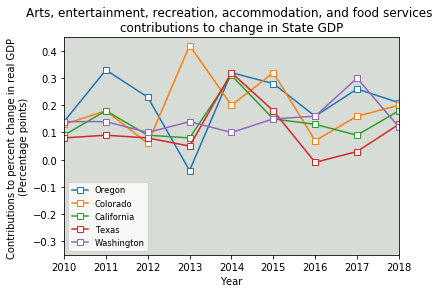

In [268]:
ax = rec_GDP_df.plot.line(marker='s', mfc='white',linestyle='-',title="Arts, entertainment, recreation, accommodation, and food services \ncontributions to change in State GDP")
ax.legend(fontsize='small', loc='lower left')
ax.set_ylabel("Contributions to percent change in real GDP \n(Percentage points)")
ax.set_xlabel("Year")
plt.ylim(-.35, .45)
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","GDP_Impact.png"),bbox_inches="tight")
plt.show()

In [256]:
foodbevtob_GDP = pd.read_csv(os.path.join("..","Data","Clean","GDP_foodbevtob_production_data_Clean.csv"))
foodbevtob_df = pd.DataFrame(foodbevtob_GDP)
foodbevtob_df

,GeoFips,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,% Change 2008 to 2017,% Change 1998 to 2017
0,0,United States*,-0.01,0.02,-0.02,0.02,-0.09,0.05,0.03,0.00,...,-0.09,-0.04,-0.04,0.03,0.00,0.05,-0.05,0.06,-1.857143,-7.000000
1,1000,Alabama,0.02,0.05,-0.03,0.17,-0.06,0.03,0.04,0.01,...,-0.23,-0.04,0.00,0.10,-0.03,-0.03,-0.02,0.03,-1.428571,0.500000
2,2000,Alaska,0.00,-0.21,-0.36,0.00,-0.14,0.10,0.22,0.11,...,-0.35,-0.11,-0.01,0.22,-0.03,0.39,-0.26,0.01,-1.055556,inf
3,4000,Arizona,-0.02,0.09,0.04,-0.04,0.03,0.03,-0.06,-0.02,...,-0.04,0.02,-0.04,-0.01,0.06,0.00,0.00,0.05,inf,-3.500000
4,5000,Arkansas,-0.15,0.31,-0.18,-0.03,0.41,0.72,0.68,-0.11,...,0.31,-0.43,-0.36,0.56,-0.03,0.03,-0.13,0.22,-1.916667,-2.466667
5,6000,California,0.00,0.05,-0.01,0.02,-0.01,0.03,-0.01,0.02,...,-0.17,-0.02,0.02,0.01,0.04,0.09,-0.08,0.05,-1.833333,inf
6,8000,Colorado,-0.08,-0.08,-0.01,0.01,-0.11,0.01,0.00,0.08,...,-0.12,-0.07,0.02,0.08,-0.08,0.04,0.04,0.04,-3.000000,-1.500000
7,9000,Connecticut,0.01,0.02,0.07,-0.03,0.08,0.07,-0.10,0.15,...,-0.06,0.01,-0.02,0.06,-0.06,0.03,-0.03,0.02,-1.117647,1.000000
8,10000,Delaware,0.02,-0.02,-0.28,0.33,-0.18,-0.14,0.02,0.16,...,-0.25,0.00,-0.05,0.16,0.01,-0.01,-0.11,0.07,-3.333333,2.500000
9,11000,District of Columbia,0.00,0.01,0.00,-0.02,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,inf,inf


In [257]:
foodbevtob_df = foodbevtob_df.loc[foodbevtob_df['GeoName'].isin(["California", "Colorado", "Oregon","Texas","Washington"])]
foodbevtob_df.head()

,GeoFips,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,% Change 2008 to 2017,% Change 1998 to 2017
5,6000,California,0.00,0.05,-0.01,0.02,-0.01,0.03,-0.01,0.02,...,-0.17,-0.02,0.02,0.01,0.04,0.09,-0.08,0.05,-1.833333,inf
6,8000,Colorado,-0.08,-0.08,-0.01,0.01,-0.11,0.01,0.00,0.08,...,-0.12,-0.07,0.02,0.08,-0.08,0.04,0.04,0.04,-3.000000,-1.500000
38,41000,Oregon,0.00,-0.22,0.10,0.04,0.18,-0.20,0.13,0.14,...,-0.29,-0.02,-0.05,0.18,0.07,0.09,-0.04,0.09,-1.391304,inf
44,48000,Texas,0.01,-0.05,-0.03,0.01,0.04,0.04,0.15,-0.04,...,-0.14,-0.01,-0.05,0.04,0.00,0.11,-0.07,0.05,-1.714286,4.000000
48,53000,Washington,-0.07,-0.10,0.00,0.03,-0.11,-0.06,0.01,0.07,...,-0.14,0.02,-0.04,0.09,0.09,-0.02,0.00,0.06,-1.240000,-1.857143


In [258]:
foodbevtob_df = foodbevtob_df.drop(['GeoFips',
'1998',
'1999',
'2000',
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
                                    '2009',
'% Change 2008 to 2017',
'% Change 1998 to 2017'], axis=1)

In [259]:
foodbevtob_df=foodbevtob_df.set_index('GeoName')
foodbevtob_df=foodbevtob_df.transpose()
foodbevtob_df = foodbevtob_df[['Oregon','Colorado','California','Texas','Washington']]
foodbevtob_df

GeoName,Oregon,Colorado,California,Texas,Washington
2010,-0.29,-0.12,-0.17,-0.14,-0.14
2011,-0.02,-0.07,-0.02,-0.01,0.02
2012,-0.05,0.02,0.02,-0.05,-0.04
2013,0.18,0.08,0.01,0.04,0.09
2014,0.07,-0.08,0.04,0.00,0.09
2015,0.09,0.04,0.09,0.11,-0.02
2016,-0.04,0.04,-0.08,-0.07,0.00
2017,0.09,0.04,0.05,0.05,0.06


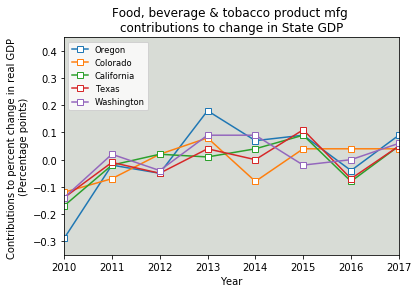

In [270]:
ax = foodbevtob_df.plot.line(marker='s', mfc='white',linestyle='-',title="Food, beverage & tobacco product mfg \ncontributions to change in State GDP")
ax.legend(fontsize='small', loc='upper left')
ax.set_ylabel("Contributions to percent change in real GDP \n(Percentage points)")
ax.set_xlabel("Year")
plt.ylim(-.35, .45)
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","GDP_FoodBevTob_Impact.png"),bbox_inches="tight")
plt.show()

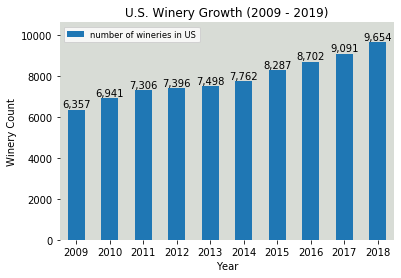

In [409]:
us_wine = pd.read_csv(os.path.join("..","Data","Clean","us_wineries_2009_2019_clean.csv"))
us_wine_df = pd.DataFrame(us_wine).set_index('year')
us_wine_df
ax = us_wine_df.plot.bar(title="U.S. Winery Growth (2009 - 2019)")
ax.legend(fontsize='small', loc='best')
ax.set_xticklabels(ax.get_xticklabels(), rotation='0', horizontalalignment='center')
ax.set_xlabel("Year")
ax.set_ylabel("Winery Count")
ax.set_facecolor("xkcd:light grey")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
rects = ax.patches

def autolabel(rects, xpos='center'): 
       
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
#         if height < 0:
#             va = 'bottom'
#             ypos = 5
#         else:
#             va = 'top'
#             ypos = -5
        ax.annotate('{:,.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos], 10),  
                    textcoords="offset points",  
                    ha=ha[xpos], va='top', color = "black")


autolabel(rects)
ax.margins(y=0.1)
plt.savefig(os.path.join("..","Images","US_Wine_Growth.png"),bbox_inches="tight")
plt.show()

In [311]:
afford = pd.read_csv(os.path.join("..","Data","Clean","NLIHC_OOR_2018_Clean.csv"))
afford_df = pd.DataFrame(afford)
afford_df

,Type,Type Code,ST,STNAME,COUNTY/METRO,Total households (2012-2016),Renter households (2012-2016),% of total households that are renters (2012-2016),Minimum wage,Estimated mean renter wage,...,Work hours per week at min. wage needed to afford 0 bdrm FMR,Work hours per week at min. wage needed to afford 1 bdrm FMR,Work hours per week at min. wage needed to afford 2 bdrm FMR,Work hours per week at min. wage needed to afford 3 bdrm FMR,Work hours per week at min. wage needed to afford 4 bdrm FMR,Work hours per week at mean renter wage needed to afford 0 bdrm FMR,Work hours per week at mean renter wage needed to afford 1 bdrm FMR,Work hours per week at mean renter wage needed to afford 2 bdrm FMR,Work hours per week at mean renter wage needed to afford 3 bdrm FMR,Work hours per week at mean renter wage needed to afford 4 bdrm FMR
0,STATE,1,AK,Alaska,Does Not Apply,250235.0,90922.0,36.0,9.84,18.84,...,69.0,78.0,101.0,143.0,172.0,36.0,41.0,53.0,75.0,90.0
1,NONMETRO,2,AK,Alaska,Does Not Apply,79124.0,27465.0,35.0,9.84,22.96,...,68.0,76.0,96.0,128.0,151.0,29.0,33.0,41.0,55.0,65.0
2,METRO,3,AK,Alaska,Anchorage HMFA,104969.0,41702.0,40.0,9.84,17.82,...,72.0,81.0,105.0,152.0,184.0,40.0,45.0,58.0,84.0,102.0
3,METRO,3,AK,Alaska,Fairbanks MSA,35303.0,14298.0,41.0,9.84,16.3,...,68.0,80.0,107.0,156.0,188.0,41.0,49.0,65.0,94.0,114.0
4,METRO,3,AK,Alaska,Matanuska-Susitna Borough HMFA,30839.0,7457.0,24.0,9.84,11.11,...,58.0,65.0,87.0,126.0,153.0,51.0,58.0,77.0,112.0,135.0
5,COUNTY,4,AK,Alaska,Aleutians East Borough,788.0,345.0,44.0,9.84,25.02,...,59.0,72.0,82.0,103.0,112.0,23.0,28.0,32.0,41.0,44.0
6,COUNTY,4,AK,Alaska,Aleutians West Census Area,1186.0,850.0,72.0,9.84,27.77,...,81.0,96.0,127.0,160.0,196.0,29.0,34.0,45.0,57.0,69.0
7,COUNTY,4,AK,Alaska,Anchorage Municipality,104969.0,41702.0,40.0,9.84,17.82,...,72.0,81.0,105.0,152.0,184.0,40.0,45.0,58.0,84.0,102.0
8,COUNTY,4,AK,Alaska,Bethel Census Area,4555.0,1634.0,36.0,9.84,20.09,...,83.0,101.0,116.0,145.0,158.0,41.0,49.0,57.0,71.0,77.0
9,COUNTY,4,AK,Alaska,Bristol Bay Borough,360.0,163.0,45.0,9.84,19.42,...,70.0,74.0,98.0,126.0,133.0,35.0,38.0,49.0,64.0,67.0


In [312]:
afford_df = afford_df.loc[afford_df['ST'].isin(["CA", "CO", "OR","TX","WA"])]
afford_df = afford_df.loc[afford_df['Type'].isin(["STATE"])]
afford_df.head()

,Type,Type Code,ST,STNAME,COUNTY/METRO,Total households (2012-2016),Renter households (2012-2016),% of total households that are renters (2012-2016),Minimum wage,Estimated mean renter wage,...,Work hours per week at min. wage needed to afford 0 bdrm FMR,Work hours per week at min. wage needed to afford 1 bdrm FMR,Work hours per week at min. wage needed to afford 2 bdrm FMR,Work hours per week at min. wage needed to afford 3 bdrm FMR,Work hours per week at min. wage needed to afford 4 bdrm FMR,Work hours per week at mean renter wage needed to afford 0 bdrm FMR,Work hours per week at mean renter wage needed to afford 1 bdrm FMR,Work hours per week at mean renter wage needed to afford 2 bdrm FMR,Work hours per week at mean renter wage needed to afford 3 bdrm FMR,Work hours per week at mean renter wage needed to afford 4 bdrm FMR
232,STATE,1,CA,California,Does Not Apply,12807387.0,5878380.0,46.0,11.00,21.5,...,79.0,93.0,119.0,164.0,189.0,40.0,48.0,61.0,84.0,97.0
322,STATE,1,CO,Colorado,Does Not Apply,2051616.0,730999.0,36.0,10.20,17.59,...,64.0,74.0,94.0,134.0,156.0,37.0,43.0,54.0,78.0,91.0
2711,STATE,1,OR,Oregon,Does Not Apply,1545745.0,597158.0,39.0,10.75,15.44,...,58.0,65.0,79.0,115.0,138.0,40.0,45.0,55.0,80.0,96.0
3200,STATE,1,TX,Texas,Does Not Apply,9289554.0,3542096.0,38.0,7.25,18.2,...,75.0,86.0,107.0,144.0,178.0,30.0,34.0,42.0,57.0,71.0
3706,STATE,1,WA,Washington,Does Not Apply,2696606.0,1013225.0,38.0,11.50,18.91,...,66.0,75.0,93.0,135.0,159.0,40.0,46.0,57.0,82.0,97.0


In [313]:
afford_df = afford_df[['Type','ST','Renter households (2012-2016)','% of total households that are renters (2012-2016)','Annual AMI','30% of AMI ','Estimated renter median income','Income needed to afford 1 bdrm FMR']]
afford_df

,Type,ST,Renter households (2012-2016),% of total households that are renters (2012-2016),Annual AMI,30% of AMI,Estimated renter median income,Income needed to afford 1 bdrm FMR
232,STATE,CA,5878380.0,46.0,80383.0,24115.0,46952.0,53391.0
322,STATE,CO,730999.0,36.0,83968.0,25190.0,41456.0,39497.0
2711,STATE,OR,597158.0,39.0,70843.0,21253.0,36096.0,36161.0
3200,STATE,TX,3542096.0,38.0,69876.0,20963.0,38153.0,32489.0
3706,STATE,WA,1013225.0,38.0,84281.0,25284.0,43815.0,44839.0


In [387]:
AMI = []
Renter_income=[]
Renter_per=[]
onebd_fmr=[]
States=["CA","CO","OR","TX","WA"]
AMI = afford_df['Annual AMI'].values
Renter_income = afford_df['Estimated renter median income'].values
Renter_per= afford_df['% of total households that are renters (2012-2016)'].values
onebd_fmr=afford_df['Income needed to afford 1 bdrm FMR'].values
# States = afford_df['ST'].values
colors = ["red","blue","orange","yellow","maroon"]

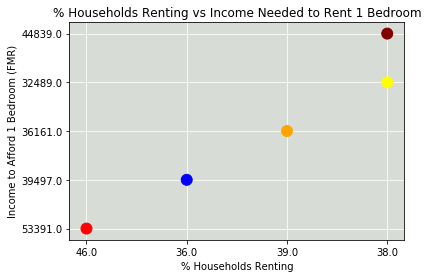

In [404]:
fix, ax = plt.subplots()
unique = np.unique(States)
scatter = ax.scatter (Renter_per,onebd_fmr,c=colors, s = 120,zorder=3)
ax.set_title('% Households Renting vs Income Needed to Rent 1 Bedroom')
# for i, u in enumerate(unique):
#     xi = [Renter_per[j] for j  in range(len(Renter_per)) if classes[j] == u]
#     yi = [onebd_fmr[j] for j  in range(len(Renter_per)) if classes[j] == u]
#     plt.scatter(label=str(u))
# plt.legend()

# ax.legend(fontsize='small', loc='best')
ax.set_xlabel("% Households Renting")
ax.set_ylabel("Income to Afford 1 Bedroom (FMR)")
ax.set_facecolor("xkcd:light grey")
ax.grid(True,color='white')
plt.savefig(os.path.join("..","Images","renters_onebed.png"),bbox_inches="tight")
plt.show()

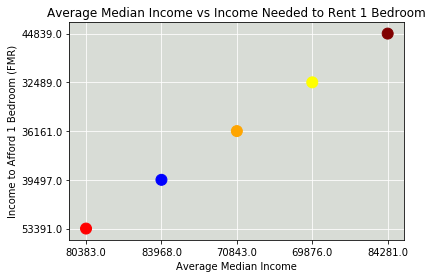

In [405]:
fix, ax = plt.subplots()

scatter = ax.scatter(AMI,onebd_fmr,c=colors,s = 120,zorder=3)
plt.title('Average Median Income vs Income Needed to Rent 1 Bedroom')
plt.xlabel('Average Median Income')
plt.ylabel('Income to Afford 1 Bedroom (FMR)')
ax.set_facecolor("xkcd:light grey")
# ax.legend(fontsize='small', loc='best')
plt.grid(True,color='white')
plt.savefig(os.path.join("..","Images","ami_onebed.png"),bbox_inches="tight")
plt.show()

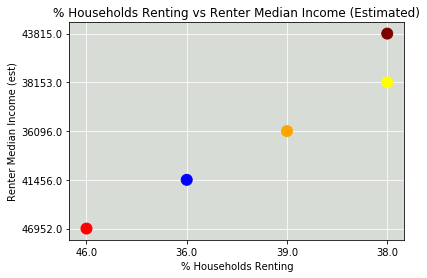

In [406]:
fix, ax = plt.subplots()

scatter = ax.scatter(Renter_per,Renter_income, c=colors, s=120,zorder=3)
plt.title('% Households Renting vs Renter Median Income (Estimated)')
plt.xlabel('% Households Renting')
plt.ylabel('Renter Median Income (est)')
ax.set_facecolor("xkcd:light grey")
plt.grid(True,color='white')
plt.savefig(os.path.join("..","Images","renters_renter_inc.png"),bbox_inches="tight")
plt.show()

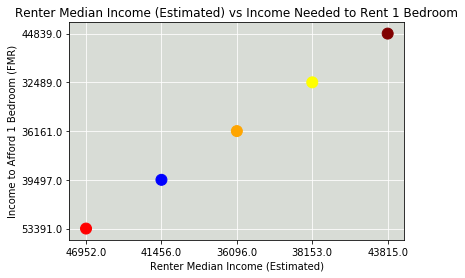

In [407]:
fix, ax = plt.subplots()
scatter = ax.scatter(Renter_income,onebd_fmr,c=colors,s=120,zorder=3)
plt.title('Renter Median Income (Estimated) vs Income Needed to Rent 1 Bedroom')
plt.xlabel('Renter Median Income (Estimated)')
plt.ylabel('Income to Afford 1 Bedroom (FMR)')
ax.set_facecolor("xkcd:light grey")
plt.grid(True,color='white')
plt.savefig(os.path.join("..","Images","renter_inc_onebed.png"),bbox_inches="tight")
plt.show()

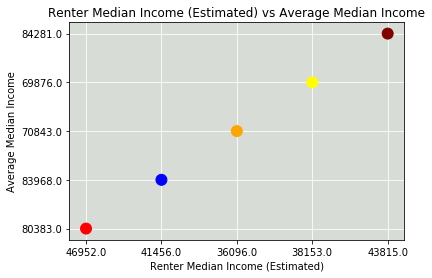

In [408]:
fix, ax = plt.subplots()
scatter = ax.scatter(Renter_income,AMI,c=colors,s=120,zorder=3)
plt.title('Renter Median Income (Estimated) vs Average Median Income')
plt.xlabel('Renter Median Income (Estimated)')
plt.ylabel('Average Median Income')
ax.set_facecolor("xkcd:light grey")
plt.grid(True,color='white')
plt.savefig(os.path.join("..","Images","renter_inc_ami"),bbox_inches="tight")
plt.show()